In [1]:

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

from envs.blackjack import BlackjackEnv
import plotting

matplotlib.style.use('ggplot')

c:\Users\xiang\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
def strategy(observation):
    """
    A policy that sticks if the player score is >= 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

In [2]:
env = BlackjackEnv()

In [12]:
def mc_pred_value(policy,num_episodes,dis_factor):
    ## returns_sum and returns_count are used to record the running returns and length of episodes
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)

    ## but we can make a successive addition to avoid the memory inefficient method like running sum
    

    ## The final value function
    V=defaultdict(float)

    for i_episode in range(1, num_episodes + 1):
        # Print out which episode we're on, useful for debugging.
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()


        ## within the first loop, we will generate each episode
        episode=[]
        state=env.reset()
        ## for a relative large time span 100, we must hit the expectation
        for t in range(100):
           action=policy(state)
           next_state, reward, done, _ = env.step(action)
           episode.append([state,action,reward])
           if done:
               break
           state=next_state

        ## we finish generate one episode here

        state_in_episode=set([tuple(x[0]) for x in episode])
        for state in state_in_episode: ## state will be [state, action, rewward]
            ## for each state in the episode, first find the index for this state happending
            first_occurrence_index= next(i for i,x in enumerate(episode) if x[0] == state)
            ## then we sum up all the afterwards rewards
            R=sum(x[2]*dis_factor**i for i,x in enumerate(episode[first_occurrence_index:]))
            returns_sum[state] += R
            returns_count[state] += 1
            V[state] = returns_sum[state]/returns_count[state]

    return V



Episode 100000/100000.

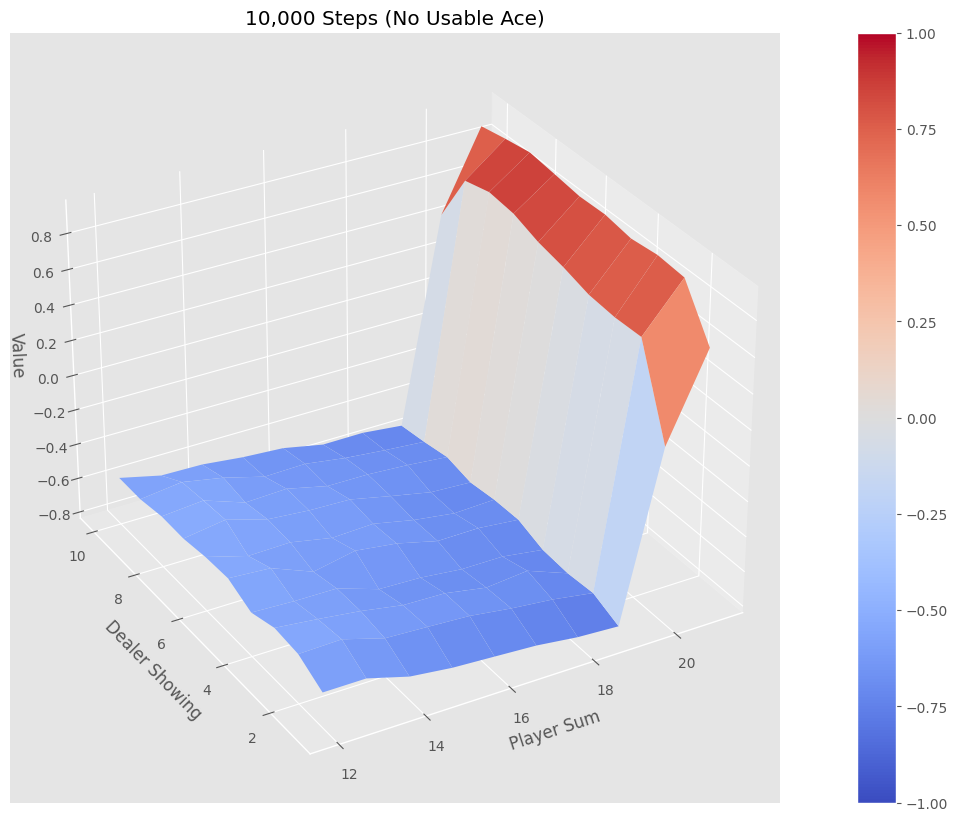

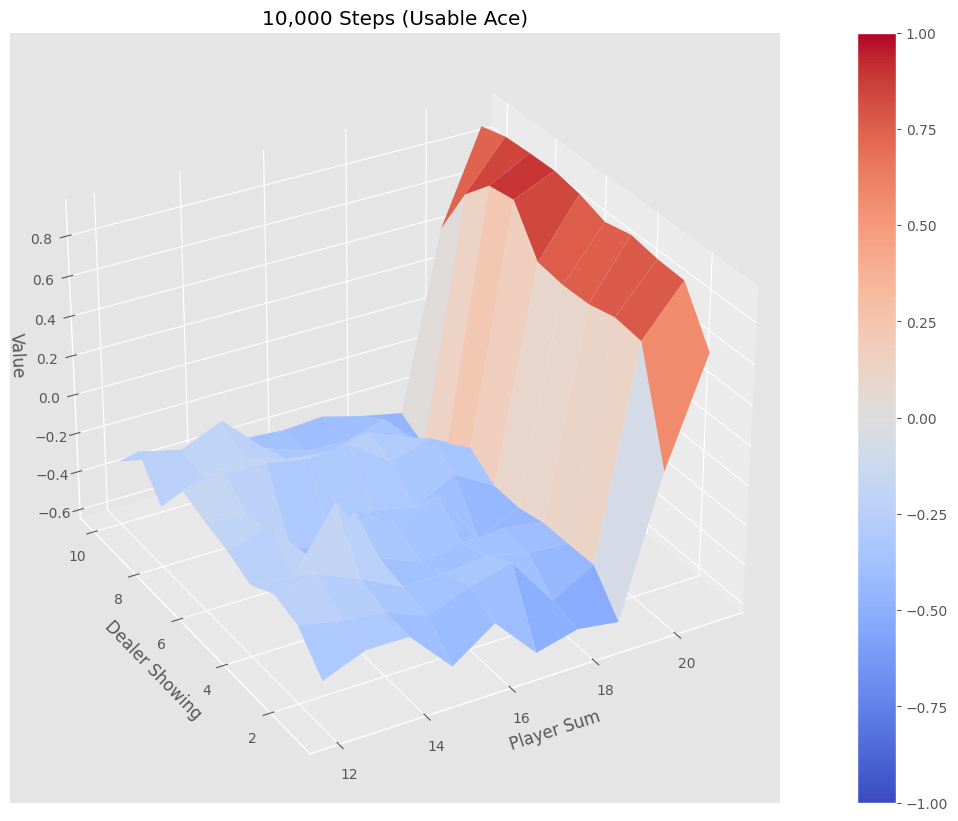

In [16]:
V = mc_pred_value(strategy, num_episodes=100000, dis_factor=1.0)
plotting.plot_value_function(V, title="10,000 Steps")
